In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# Epydemix import
import sys
sys.path.append("../")
from epydemix.epimodel import EpiModel
from epydemix.plotting import plot_quantiles, plot_spectral_radius

# EpiModel Object

The ```EpiModel``` object is the core of the ```epydemix``` simulation module. With ```EpiModel``` objects we can define flexible epidemic models and then simulate them.

Defining an ```EpiModel``` object requires three simple steps: 
1. Define the compartments.
2. Specify the model parameters.
3. Define the transitions.

Parameters can also be defined before compartments, while transitions must be defined after the definition of compartments, otherwise this will raise an error. Now, let's walk through these steps by creating a simple SIR model:

In [2]:
# create model 
model = EpiModel()

# add compartments
model.add_compartments(["S", "I", "R"])

# define parameters
model.add_parameter(name="beta", value=0.3)
model.add_parameter(name="mu", value=0.1)

# add transitions 
model.add_transition(source="S", target="I", rate="beta", agent="I")
model.add_transition(source="I", target="R", rate="mu")

In more details: 
- compartments are string identifying the name of the compartment. They can be added when creating the ```EpiModel``` object or afterwards using the ```add_compartments``` method (which takes as input both single and list of compartments)

- parameters can be added using the ```add_parameters``` method by specifying their name and value. Each parameter's value can either be a scalar, in which case the parameter is treated as a constant, or an array, allowing for a time-varying parameter.

- transitions are represented as ```Transition``` objects and they have the following attributes: 
    - ```source```: the name of the source compartment of the transition
    - ```target```: the name of the target compartment of the transition
    - ```rate```: the expression of the rate of the transition or directly the value of the rate
    - ```agent```: the name of the compartment which catalyzes the transition (in case of spontaneous transitions it is set to None)


We are now ready to run our first simulation. To do so, we will need to specify start and end date of the simulation and the initial conditions for each compartment:

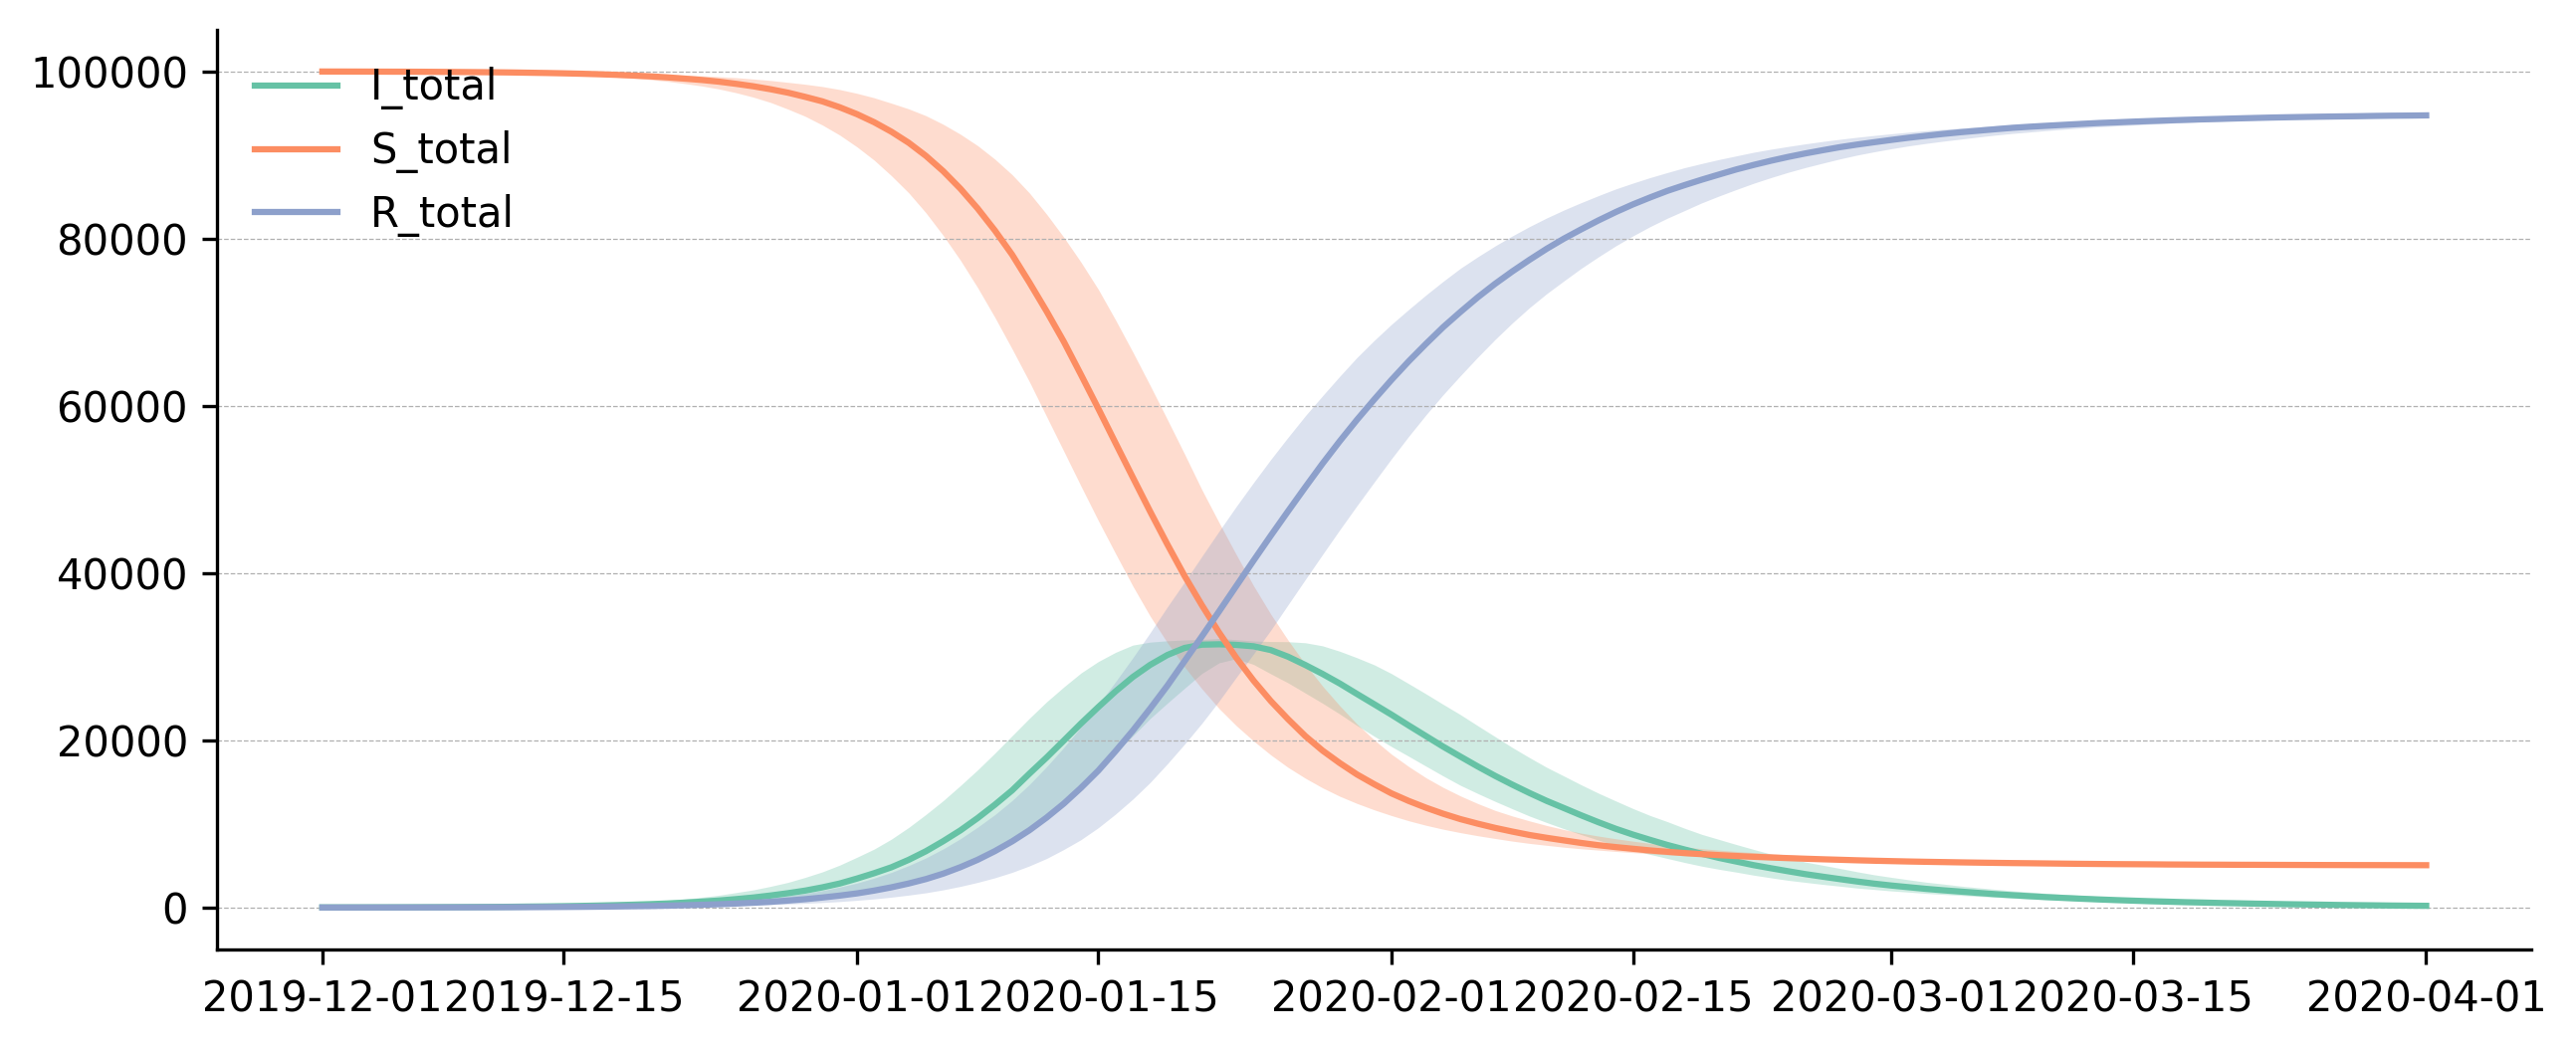

In [3]:
results = model.run_simulations(start_date="2019-12-01", 
                                end_date="2020-04-01", 
                                S=99990,
                                I=10)
plot_quantiles(results, columns=["I_total", "S_total", "R_total"])

By default, an ```EpiModel``` object has a population of 100000 homogeneously mixed. These details can be accessed via the ```population``` attribute:

In [ ]:
print("Population:", model.population.Nk)
print("Contact matrices:", model.population.contact_matrices)
print("Population name:", model.population.name)


- real populations
- custom populations